<a href="https://colab.research.google.com/github/srinikha193/Data-Analysis-Course-Work/blob/main/DV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting and Visualization

Why making informative visualizations (sometimes called plots) is one of the most important
tasks in data analysis? <br>
- Identify outliers
- Identify needed data transformations
- Generating ideas for model
- Communicating the results

Python has many add-on libraries for making static or dynamic visualizations, but in this notebook we will be mainly focused on matplotlib and libraries built on top of it. matplotlib supports various GUI backends on all operating systems and additionally can export visualizations to all of the common vector and raster graphics formats (PDF, SVG, JPG, PNG, BMP, GIF, etc.). <br> <br> Over time, matplotlib has spawned a number of add-on toolkits for data visualization that use matplotlib for their underlying plotting. One of these is seaborn, which we explore later in this notebook. <br> <br>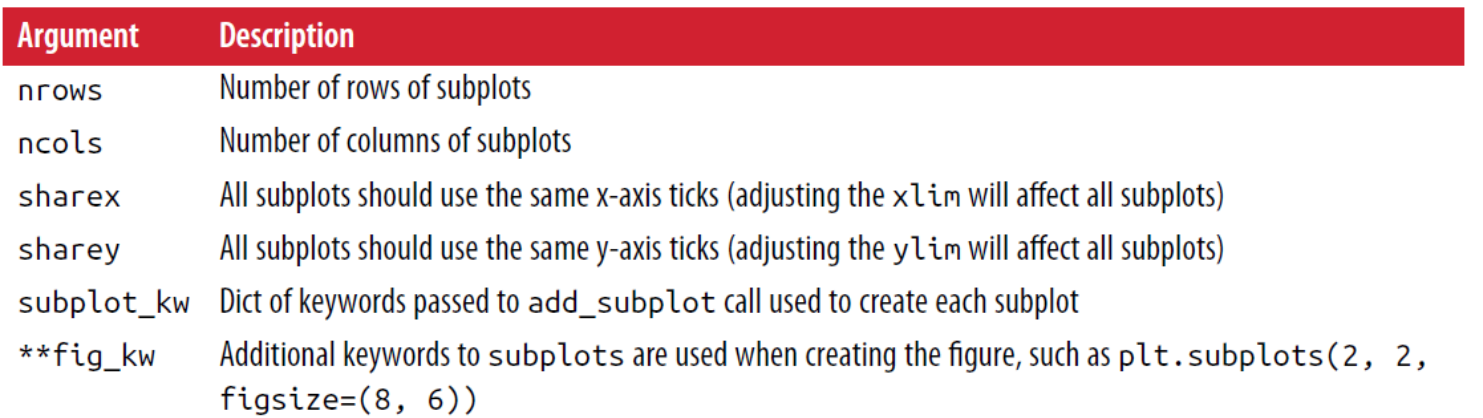

With matplotlib, we use the following import convention:

In [ ]:
import matplotlib.pyplot as plt

After importing the library, we can try creating a simple plot:

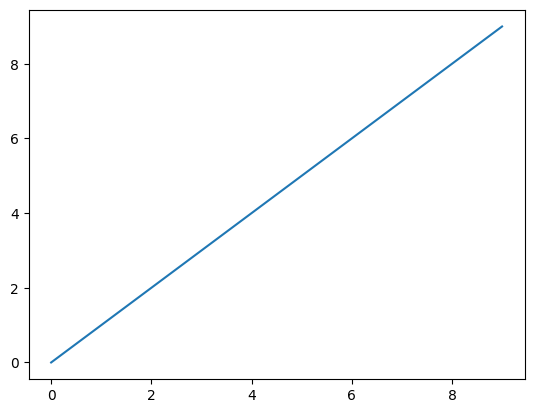

In [ ]:
import numpy as np
data = np.arange(10)
data
fig = plt.figure()
plt.plot(data)

### Figures and Subplots

Plots in matplotlib reside within a _Figure_ object. You can create a new figure with
plt.figure:

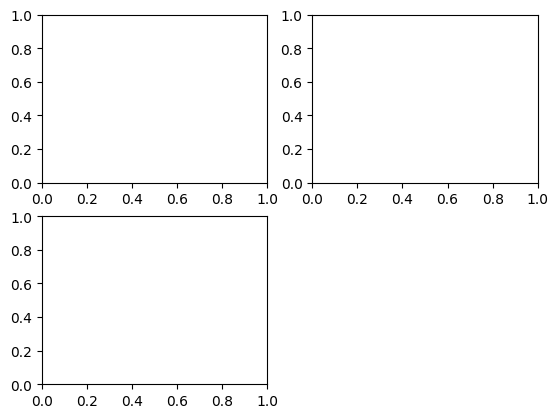

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

When you issue a plotting command like _plt.plot([1.5, 3.5, -2, 1.6])_ , matplotlib
draws on the last figure and subplot used (creating one if necessary). For example:

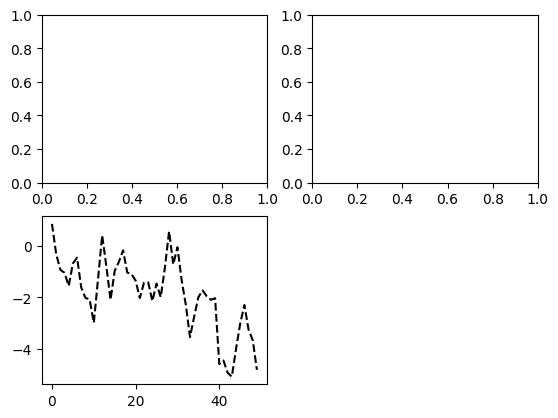

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

The 'k--' is a style option instructing matplotlib to plot a black dashed line. The objects returned by _fig.add_subplot_ here are _AxesSubplot_ objects, on which you can directly plot on the other empty subplots by calling each one’s instance method. For example:

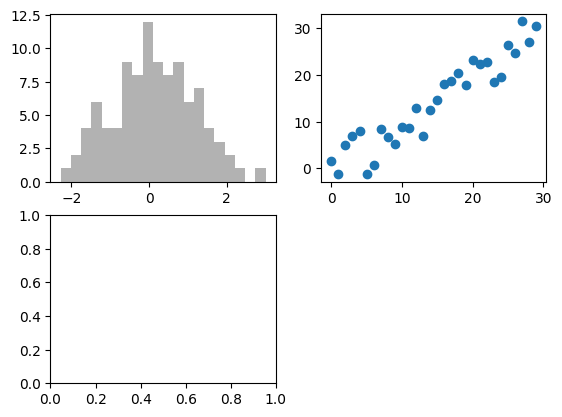

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
# run and see figure 2

You can find a comprehensive catalog of plot types in the [matplotlib documentation](https://matplotlib.org/).

Creating a figure with a grid of subplots is a very common task, so matplotlib
includes a convenience method, _plt.subplots_ , that creates a new figure and returns
a NumPy array containing the created subplot objects:

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

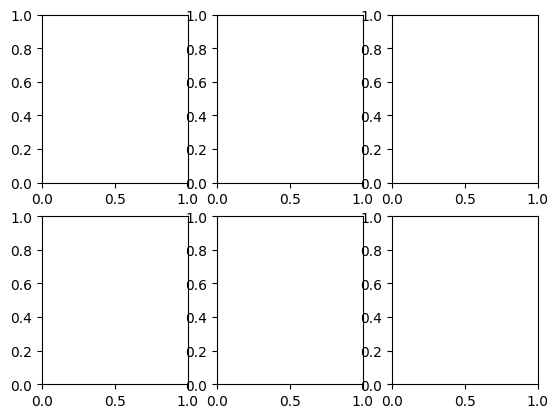

In [ ]:
fig, axes = plt.subplots(2, 3)
axes

This is very useful, as the _axes_ array can be easily indexed like a two-dimensional
array; for example, _axes[0, 1]_. You can also indicate that subplots should have the
same x- or y-axis using _sharex_ and _sharey_ , respectively. This is especially useful
when you’re comparing data on the same scale; otherwise, matplotlib autoscales plot
limits independently.

#### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the
subplots and spacing between subplots. This spacing is all specified relative to the
height and width of the plot, so that if you resize the plot either programmatically or
manually using the GUI window, the plot will dynamically adjust itself. You can
change the spacing using the _subplots_adjust_ method on _Figure_ objects:

subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

_wspace_ and _hspace_ controls the percent of the figure width and figure height, respectively,
to use as spacing between subplots. Here is a small example where we shrink the
spacing all the way to zero.

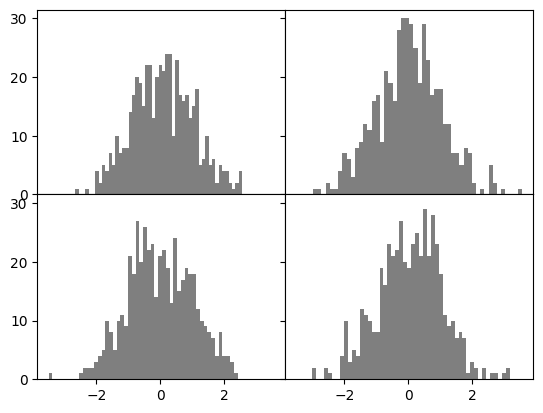

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

You may notice that the axis labels overlap. matplotlib doesn’t check whether the
labels overlap, so in a case like this you would need to fix the labels yourself by specifying
explicit tick locations and tick labels (later on we’ll look at how to do this ).

### Colors, Markers, and Line Styles

Matplotlib’s main _plot_ function accepts arrays of x and y coordinates and optionally a
string abbreviation indicating color and line style. For example, to plot _x_ versus _y_
with green dashes, you would execute:

In [ ]:
ax.plot(x, y, 'g--') # do not run this

NameError: name 'ax' is not defined

This way of specifying both color and line style in a string is provided as a convenience;
in practice if you were creating plots programmatically you might prefer not
to have to munge strings together to create plots with the desired style. The same plot
could also have been expressed more explicitly as:

In [ ]:
ax.plot(x, y, linestyle='--', color='g') # do not run this

NameError: name 'ax' is not defined

Line plots can additionally have _markers_ to highlight the actual data points. Since
matplotlib creates a continuous line plot, interpolating between points, it can occasionally
be unclear where the points lie. The marker can be part of the style string,
which must have color followed by marker type and line style. For example:

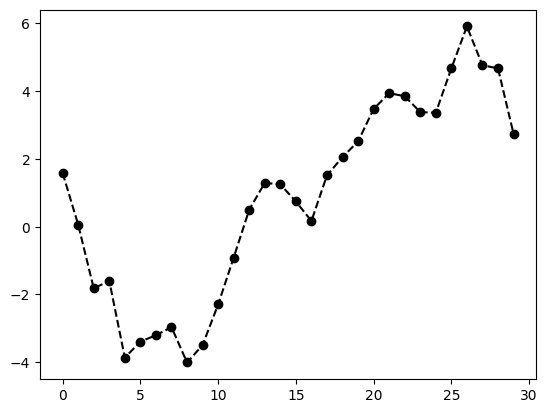

In [ ]:
from numpy.random import randn
plt.figure()
plt.plot(randn(30).cumsum(), 'ko--')

This could also have been written more explicitly as:

In [ ]:
plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

For line plots, you will notice that subsequent points are linearly interpolated by
default. This can be altered with the _drawstyle_ option:

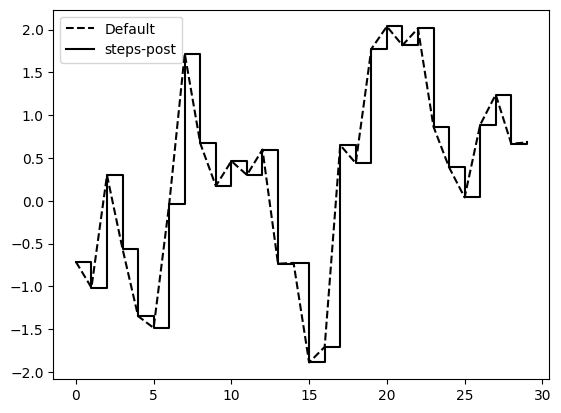

In [ ]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

Here, since we passed the _label_
arguments to plot, we are able to create a plot legend to identify each line using
_plt.legend_.

You can find a  catalog of plot colors [here](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html).

### Ticks, Labels, and Legends

For most kinds of plot decorations you can use the
procedural pyplot interface (i.e., _matplotlib.pyplot_ ). <br><br>
The _pyplot_ interface, designed for interactive use, consists of methods like _xlim_ ,
_xticks_ , and _xticklabels_ . These control the plot range, tick locations, and tick labels,
respectively. They can be used in two ways:<br><br>
- Called with no arguments returns the current parameter value (e.g., plt.xlim() returns the current x-axis plotting range)
- Called with parameters sets the parameter value (e.g., _plt.xlim([0, 10])_ , sets the x-axis range to 0 to 10)

All such methods act on the active or most recently created AxesSubplot. Each of
them corresponds to two methods on the subplot object itself; in the case of _xlim_
these are _ax.get_xlim_ and _ax.set_xlim_ .

#### Setting the title, axis labels, ticks, and ticklabels

To illustrate customizing the axes, I’ll create a simple figure:

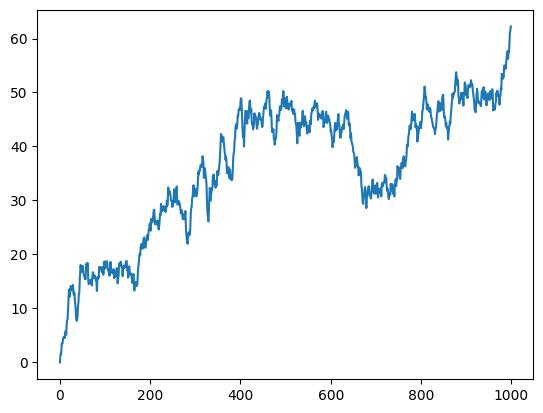

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

To change the x-axis ticks, it’s easiest to use _set_xticks_ and _set_xticklabels_. The
former instructs matplotlib where to place the ticks along the data range; by default
these locations will also be the labels. But we can set any other values as the labels
using _set_xticklabels_ :

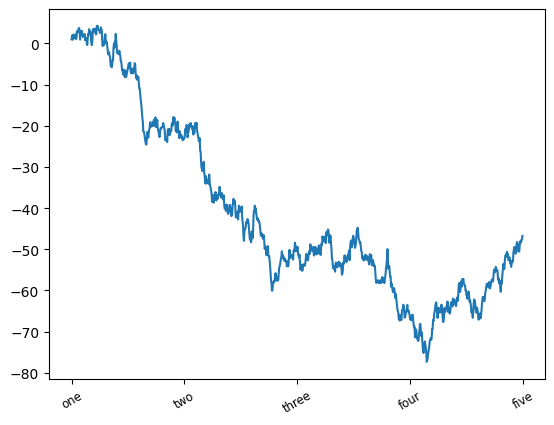

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

The _rotation_ option sets the x tick labels at a 30-degree rotation. Lastly, _set_xlabel_
gives a name to the x-axis and _set_title_ the subplot title:

Text(0.5, 0, 'Stages')

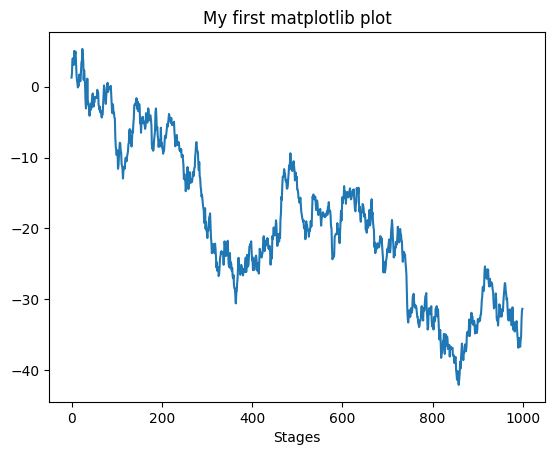

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages') # run and see the figure

Modifying the y-axis consists of the same process, substituting y for x in the above.

#### Adding legends

Legends are another critical element for identifying plot elements. There are a couple
of ways to add one. The easiest is to pass the _label_ argument when adding each piece
of the plot:

Once you’ve done this, you can either call _ax.legend()_ or _plt.legend()_ to automatically
create a legend.

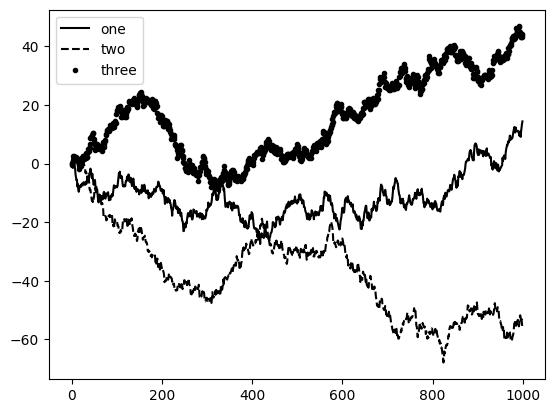

In [ ]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

## Plotting with pandas and seaborn

In pandas we may have multiple columns of data, along with row and column labels.
pandas itself has built-in methods that simplify create visualizations from DataFrame and Series objects. Another library is _seaborn_ , a statistical graphics library created
by Michael Waskom. Seaborn simplifies creating many common visualization
types.

### Line Plots

Series and DataFrame each have a _plot_ attribute for making some basic plot types. By
default, _plot()_ makes line plots:

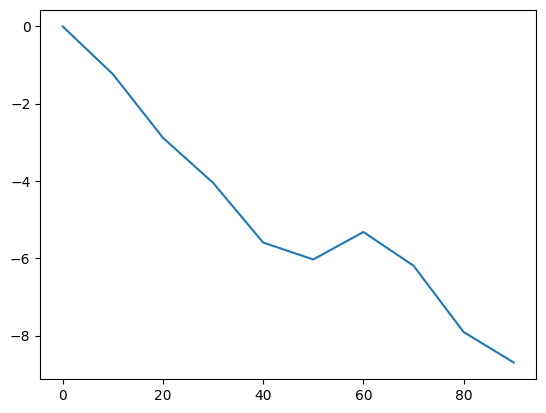

In [ ]:
import pandas as pd

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

The Series object’s index is passed to matplotlib for plotting on the x-axis, though you
can disable this by passing _use_index=False_ . The x-axis ticks and limits can be
adjusted with the _xticks_ and _xlim_ options, and y-axis respectively with _yticks_ and _ylim_. We'll discuss a few more of
plot options throughout this section and leave the rest to you to explore.

Most of pandas’s plotting methods accept an optional _ax_ parameter, which can be a
matplotlib subplot object. This gives you more flexible placement of subplots in a grid
layout.
DataFrame’s _plot_ method plots each of its columns as a different line on the same
subplot, creating a legend automatically:

<Axes: >

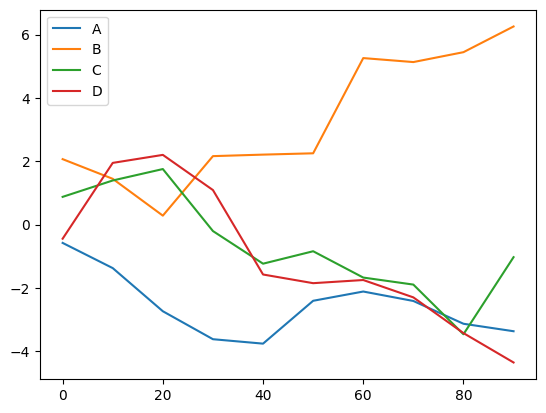

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

The _plot.bar()_ and _plot.barh()_ make vertical and horizontal bar plots, respectively.
In this case, the Series or DataFrame index will be used as the x (bar) or y
(barh) ticks:

<Axes: >

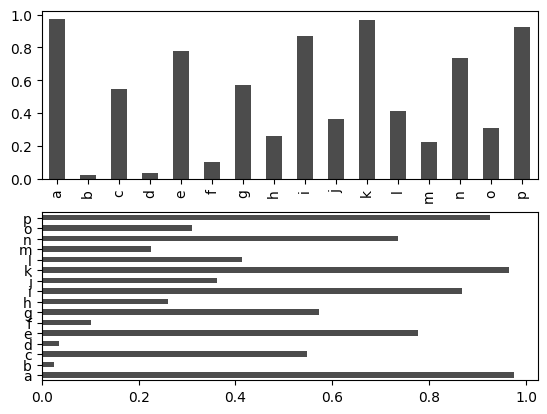

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

The options _color='k'_ and _alpha=0.7_ set the color of the plots to black and use partial
transparency on the filling. <br><br>
With a DataFrame, bar plots group the values in each row together in a group in bars,
side by side, for each value.

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.166611,0.331904,0.955766,0.163555
two,0.014122,0.878109,0.863407,0.767011
three,0.086824,0.200261,0.417013,0.413247
four,0.886965,0.018588,0.973953,0.834048
five,0.258997,0.751623,0.517367,0.597253
six,0.795647,0.691768,0.818226,0.468458


<Axes: >

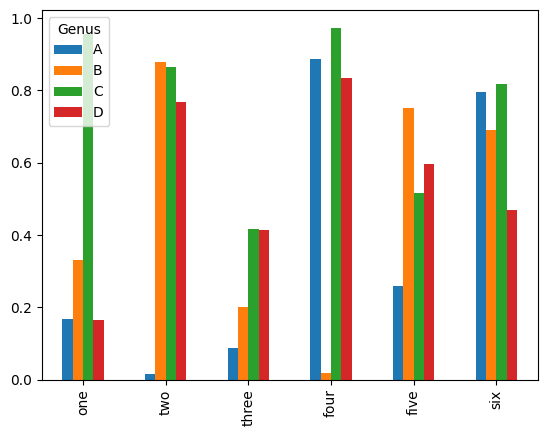

In [ ]:
df.plot.bar()

Note that the name “Genus” on the DataFrame’s columns is used to title the legend.<br><br>
We create stacked bar plots from a DataFrame by passing stacked=True, resulting in
the value in each row being stacked together.

<Axes: >

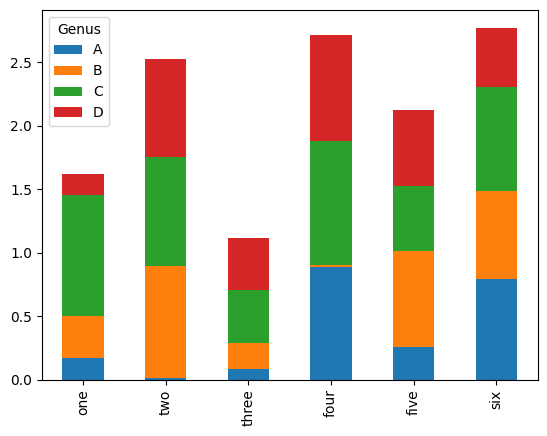

In [ ]:
df.plot.bar(stacked=True)

<Axes: >

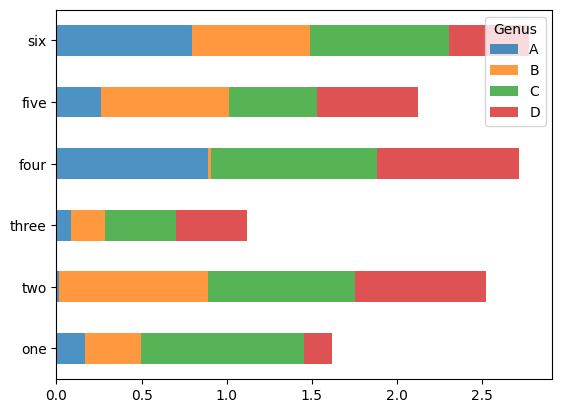

In [ ]:
df.plot.barh(stacked=True, alpha=0.8)


With data that requires aggregation or summarization before making a plot, using the
_seaborn_ package can make things much simpler. Let’s look now at the tips dataset and see the tipping percentage
by day with seaborn:

In [ ]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

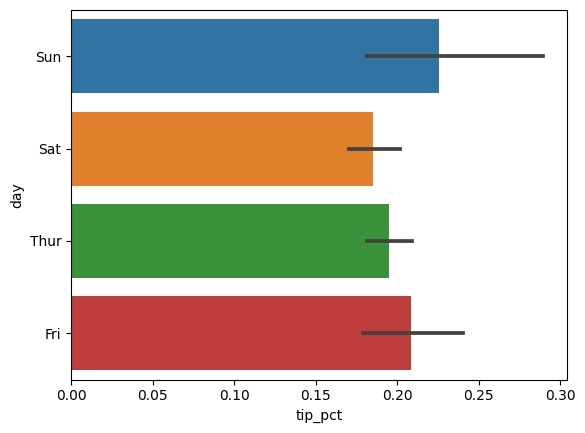

In [ ]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Plotting functions in seaborn take a data argument, which can be a pandas DataFrame. The other arguments refer to column names. Because there are multiple
observations for each value in the day, the bars are the average value of _tip_pct_. The
black lines drawn on the bars represent the 95% confidence interval. <br><br>
_seaborn.barplot_ has a _hue_ option that enables us to split by an additional categorical
value:

<Axes: xlabel='tip_pct', ylabel='day'>

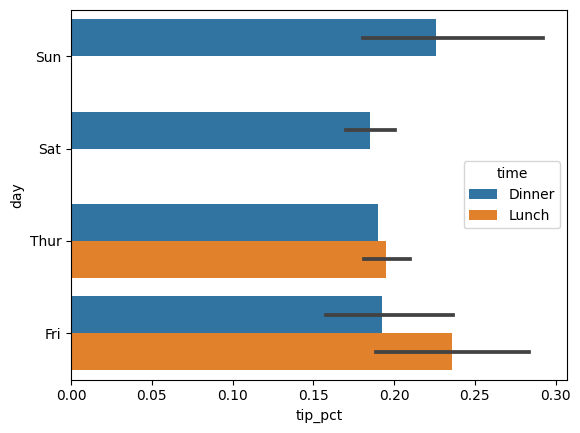

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

## Histograms

A histogram is a kind of bar plot that gives a discretized display of value frequency.
The data points are split into discrete, evenly spaced bins, and the number of data
points in each bin is plotted. Using the tipping data from before, we can make a histogram
of tip percentages of the total bill using the _plot.hist_ method on the Series:

<Axes: ylabel='Frequency'>

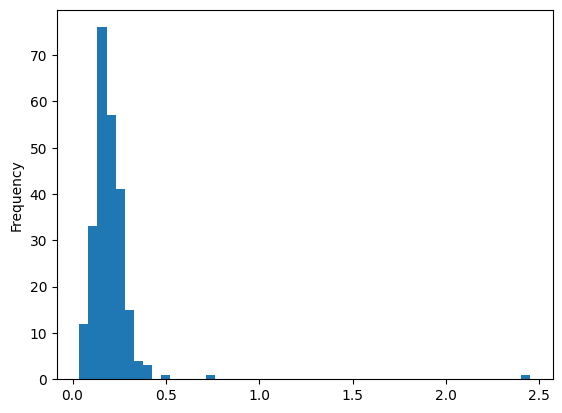

In [ ]:
tips = pd.read_csv('tips.csv')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
plt.figure()
tips['tip_pct'].plot.hist(bins=50)

## Density Plots

A related plot type is a density plot, which is formed by computing an estimate of a
continuous probability distribution that might have generated the observed data. The
usual procedure is to approximate this distribution as a mixture of “kernels”—that is,
simpler distributions like the normal distribution. Thus, density plots are also known
as kernel density estimate (KDE) plots. _plot.kde_ makes a density plot using
the conventional mixture-of-normals estimate:

<Axes: ylabel='Density'>

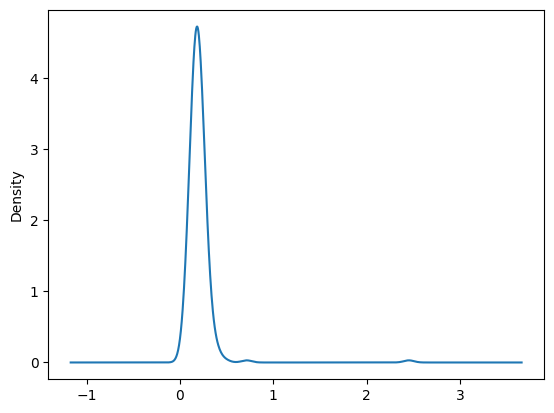

In [ ]:
plt.figure()
tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier through its distplot
method, which can plot both a histogram and a continuous density estimate simultaneously.
As an example, consider a bimodal distribution consisting of draws from
two different standard normal distributions:

<ipython-input-44-49778331e656>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, bins=100, color='k')


<Axes: ylabel='Density'>

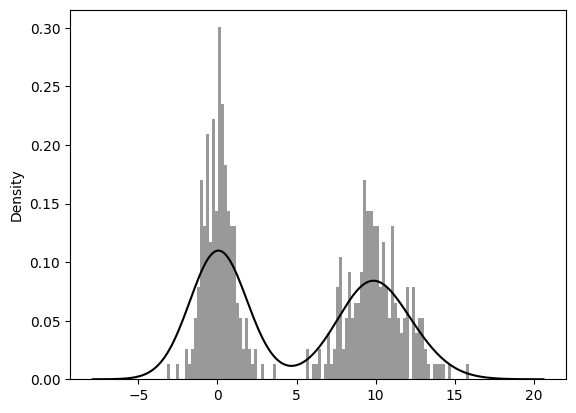

In [ ]:
plt.figure()
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

## Scatter or Point Plots

Point plots or scatter plots can be a useful way of examining the relationship between
two one-dimensional data series. For example, consider a new dataset titled "macrodata" (download it from your Canvas), select a few variables, then compute log differences:

In [ ]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


We can then use seaborn’s _regplot_ method, which makes a scatter plot and fits a linear
regression line:

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

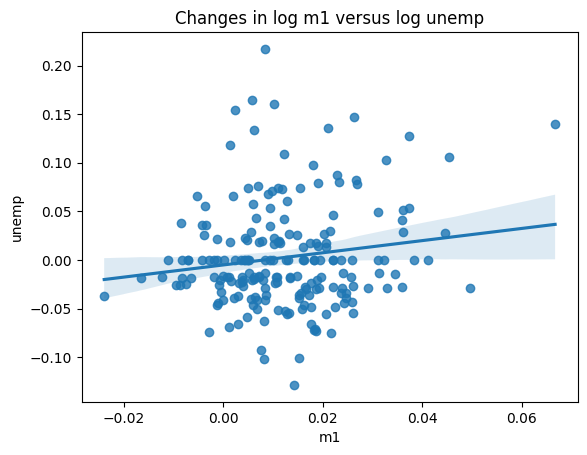

In [ ]:
plt.figure()
sns.regplot(x = 'm1', y = 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among
a group of variables; this is known as a pairs plot or scatter plot matrix. Making such a
plot from scratch is a bit of work, so seaborn has a convenient _pairplot_ function,
which supports placing histograms or density estimates of each variable along the
diagonal:

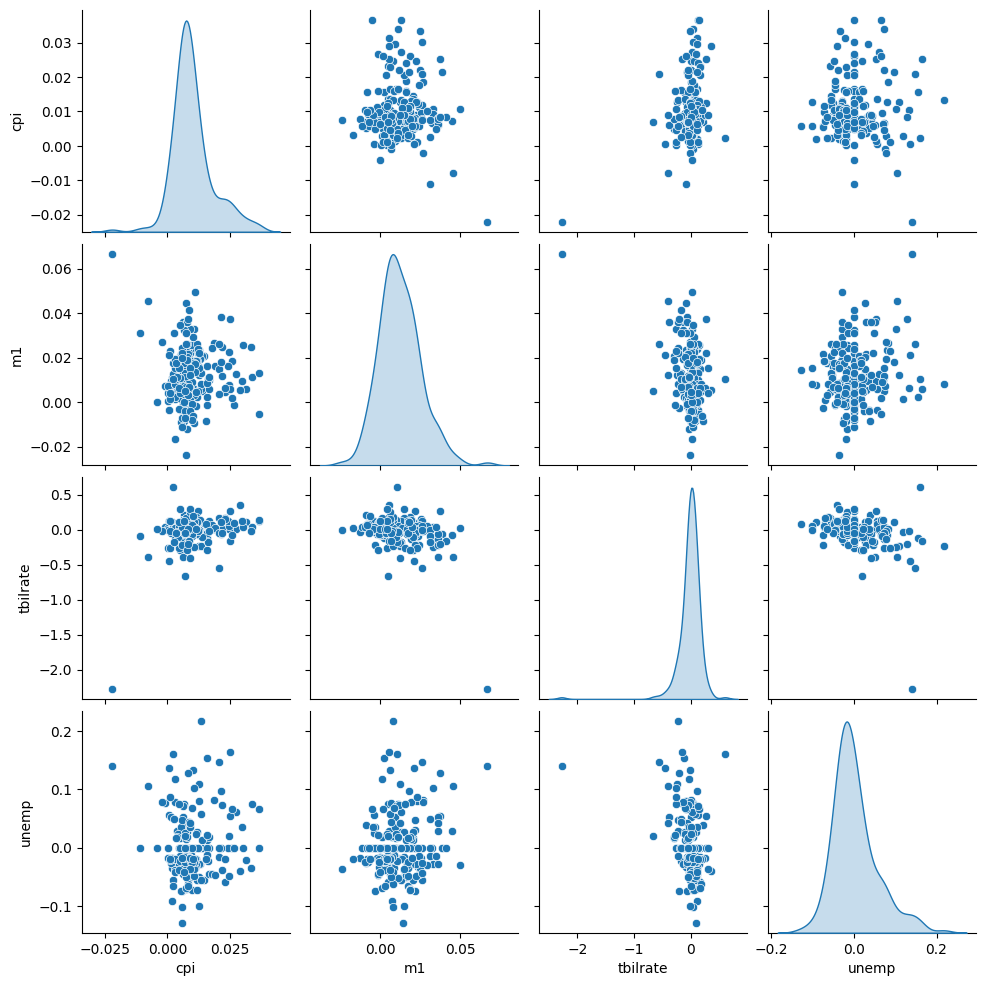

In [ ]:
sns.pairplot(trans_data, diag_kind='kde')

## Facet Grids and Categorical Data

What about datasets where we have additional grouping dimensions? One way to visualize
data with many categorical variables is to use a facet grid. Seaborn has a useful
built-in function _catplot_ that simplifies making many kinds of faceted plots:

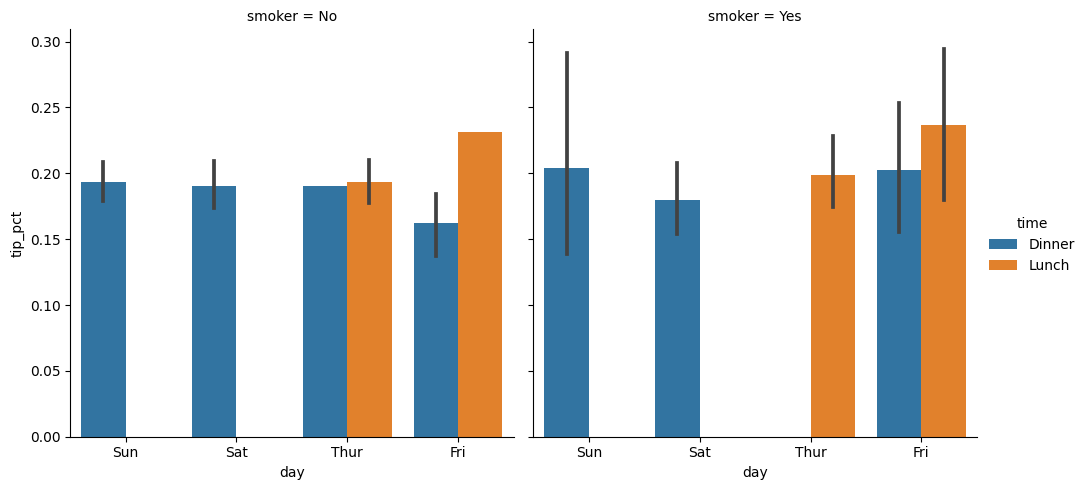

In [ ]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

Instead of grouping by 'time' by different bar colors within a facet, we can also
expand the facet grid by adding one row per _time_ value

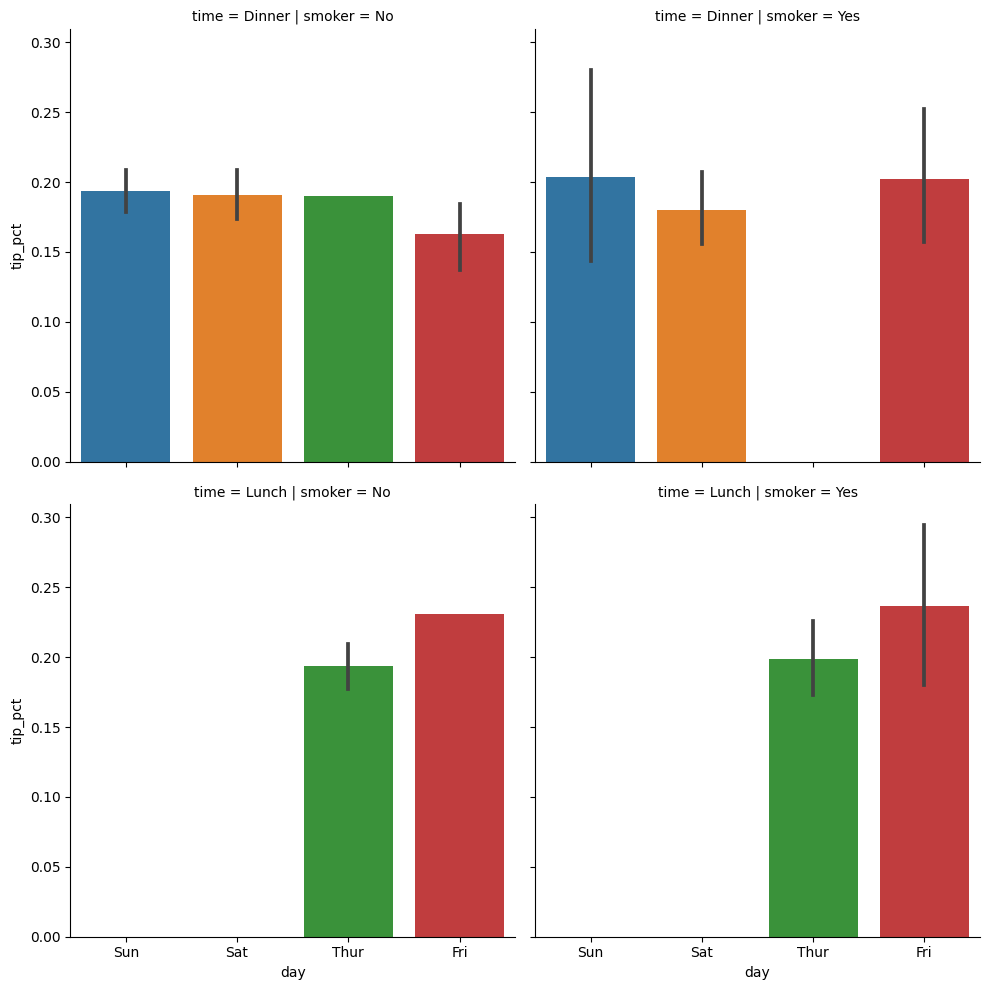

In [ ]:
sns.catplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

_catplot_ supports other plot types that may be useful depending on what you are
trying to display. For example, box plots (which show the median, quartiles, and outliers)
can be an effective visualization type:

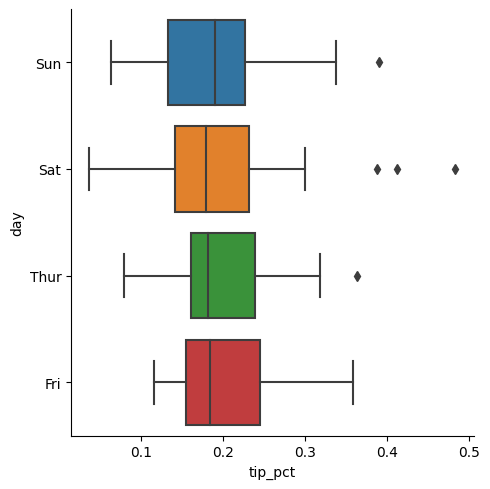

In [ ]:
sns.catplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## Other Python Visualization Tools

As is common with open source, there are a plethora of options for creating graphics
in Python (too many to list). Since 2010, much development effort has been focused
on creating interactive graphics for publication on the web. With tools like Bokeh and
Plotly, it’s now possible to specify dynamic, interactive graphics in Python that are
destined for a web browser.<br><br>
For creating static graphics for print or web, defaulting to matplotlib
and add-on libraries like pandas and seaborn is recommended. For other data visualization
requirements, it may be useful to learn one of the other available tools out there.